<a href="https://colab.research.google.com/github/kayoricardo/quant/blob/main/Leil%C3%B5es%20Tesouro%20Nacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import requests
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [125]:
url = "https://apiapex.tesouro.gov.br/aria/v1/api-leiloes-pub/custom/resultados"
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
else:
    print("Falha na solicitação. Código de status:", response.status_code)


In [103]:
dataframe = pd.DataFrame(data['registros'])

In [104]:
dataframe

,NUMERO_PORTARIA,FINANCEIRO ACEITO SEGUNDA VOLTA,VENCIMENTO,FINANCEIRO BCB,QUANTIDADE ACEITA SEGUNDA VOLTA,QUANTIDADE ACEITA,TAXA,TIPO,DATA,FINANCEIRO ACEITO,BENCHMARK,OFERTA,TITULO,QUANTIDADE BCB,LIQUIDACAO
0,160,1.267192e+08,01/09/2027,0.0,8443.0,300000,0.1126,Venda,09/07/2024,4.502636e+09,LFT 3 anos,300000,LFT,0,10/07/2024
1,158,4.723132e+08,15/05/2029,0.0,110509.0,500000,6.4194,Venda,09/07/2024,2.136990e+09,NTN-B 5 anos,500000,NTN-B,0,10/07/2024
2,160,9.532387e+08,01/09/2030,0.0,63992.0,1000000,0.1812,Venda,09/07/2024,1.489622e+10,LFT 6 anos,1000000,LFT,0,10/07/2024
3,159,0.000000e+00,15/05/2035,0.0,0.0,150000,6.3480,Venda,09/07/2024,6.356293e+08,NTN-B 10 anos,150000,NTN-B,0,10/07/2024
4,159,0.000000e+00,15/08/2060,0.0,0.0,150000,6.3678,Venda,09/07/2024,6.306416e+08,NTN-B 40 anos,150000,NTN-B,0,10/07/2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,11,2.398339e+08,01/07/2017,0.0,321286.0,2500000,12.6289,Venda,08/01/2015,1.866203e+09,LTN 24 meses,2500000,LTN,0,09/01/2015
4593,11,4.193573e+07,01/01/2019,0.0,66943.0,2560600,12.5900,Venda,08/01/2015,1.604061e+09,LTN 48 meses,3000000,LTN,0,09/01/2015
4594,13,2.568462e+08,01/01/2021,0.0,282796.0,1026000,12.4540,Venda,08/01/2015,9.318525e+08,NTN-F 7 anos,1500000,NTN-F,0,09/01/2015
4595,12,2.990857e+08,01/03/2021,0.0,45648.0,2000000,0.0120,Venda,08/01/2015,1.310401e+10,LFT 6 anos,2000000,LFT,0,09/01/2015


In [105]:
hoje = datetime.today().strftime('%d/%m/%Y')
print(hoje)

11/07/2024


In [106]:
inicio = '01/01/2024'

In [107]:
dataframe['DATA'] = pd.to_datetime(dataframe['DATA'], format='%d/%m/%Y')
df_2024 = dataframe[dataframe['DATA'] >= '01/01/2024']
df = dataframe[dataframe['DATA'] < inicio]

In [108]:
#df.to_csv('leiloes_tesouro_nacional.csv', index=False)

In [109]:
df

,NUMERO_PORTARIA,FINANCEIRO ACEITO SEGUNDA VOLTA,VENCIMENTO,FINANCEIRO BCB,QUANTIDADE ACEITA SEGUNDA VOLTA,QUANTIDADE ACEITA,TAXA,TIPO,DATA,FINANCEIRO ACEITO,BENCHMARK,OFERTA,TITULO,QUANTIDADE BCB,LIQUIDACAO
292,1622,0.000000e+00,01/10/2024,0.0,0.0,1000000,10.2410,Venda,2023-12-21,9.273300e+08,LTN 12 meses,1000000,LTN,0,22/12/2023
293,1622,0.000000e+00,01/10/2025,0.0,0.0,12000000,9.7248,Venda,2023-12-21,1.017911e+10,LTN 24 meses,12000000,LTN,0,22/12/2023
294,1622,0.000000e+00,01/07/2027,0.0,0.0,7550000,9.9239,Venda,2023-12-21,5.417575e+09,LTN 48 meses,10000000,LTN,0,22/12/2023
295,1623,0.000000e+00,01/01/2029,0.0,0.0,1000000,10.1110,Venda,2023-12-21,1.043813e+09,NTN-F 6 anos,1000000,NTN-F,0,22/12/2023
296,1623,1.219738e+08,01/01/2033,0.0,118996.0,350000,10.4296,Venda,2023-12-21,3.586164e+08,NTN-F 10 anos,500000,NTN-F,0,22/12/2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,11,2.398339e+08,01/07/2017,0.0,321286.0,2500000,12.6289,Venda,2015-01-08,1.866203e+09,LTN 24 meses,2500000,LTN,0,09/01/2015
4593,11,4.193573e+07,01/01/2019,0.0,66943.0,2560600,12.5900,Venda,2015-01-08,1.604061e+09,LTN 48 meses,3000000,LTN,0,09/01/2015
4594,13,2.568462e+08,01/01/2021,0.0,282796.0,1026000,12.4540,Venda,2015-01-08,9.318525e+08,NTN-F 7 anos,1500000,NTN-F,0,09/01/2015
4595,12,2.990857e+08,01/03/2021,0.0,45648.0,2000000,0.0120,Venda,2015-01-08,1.310401e+10,LFT 6 anos,2000000,LFT,0,09/01/2015


In [110]:
df['TIPO_LEILAO'] = df['TITULO'].apply(lambda x: 'Pré' if x in ['LTN', 'NTN-F'] else 'IPCA')
df['ACEITO/OFERTADO'] =  df['QUANTIDADE ACEITA'] / df['OFERTA']

<ipython-input-110-73e291b94a85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TIPO_LEILAO'] = df['TITULO'].apply(lambda x: 'Pré' if x in ['LTN', 'NTN-F'] else 'IPCA')
<ipython-input-110-73e291b94a85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ACEITO/OFERTADO'] =  df['QUANTIDADE ACEITA'] / df['OFERTA']


In [111]:
df

,NUMERO_PORTARIA,FINANCEIRO ACEITO SEGUNDA VOLTA,VENCIMENTO,FINANCEIRO BCB,QUANTIDADE ACEITA SEGUNDA VOLTA,QUANTIDADE ACEITA,TAXA,TIPO,DATA,FINANCEIRO ACEITO,BENCHMARK,OFERTA,TITULO,QUANTIDADE BCB,LIQUIDACAO,TIPO_LEILAO,ACEITO/OFERTADO
292,1622,0.000000e+00,01/10/2024,0.0,0.0,1000000,10.2410,Venda,2023-12-21,9.273300e+08,LTN 12 meses,1000000,LTN,0,22/12/2023,Pré,1.000000
293,1622,0.000000e+00,01/10/2025,0.0,0.0,12000000,9.7248,Venda,2023-12-21,1.017911e+10,LTN 24 meses,12000000,LTN,0,22/12/2023,Pré,1.000000
294,1622,0.000000e+00,01/07/2027,0.0,0.0,7550000,9.9239,Venda,2023-12-21,5.417575e+09,LTN 48 meses,10000000,LTN,0,22/12/2023,Pré,0.755000
295,1623,0.000000e+00,01/01/2029,0.0,0.0,1000000,10.1110,Venda,2023-12-21,1.043813e+09,NTN-F 6 anos,1000000,NTN-F,0,22/12/2023,Pré,1.000000
296,1623,1.219738e+08,01/01/2033,0.0,118996.0,350000,10.4296,Venda,2023-12-21,3.586164e+08,NTN-F 10 anos,500000,NTN-F,0,22/12/2023,Pré,0.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,11,2.398339e+08,01/07/2017,0.0,321286.0,2500000,12.6289,Venda,2015-01-08,1.866203e+09,LTN 24 meses,2500000,LTN,0,09/01/2015,Pré,1.000000
4593,11,4.193573e+07,01/01/2019,0.0,66943.0,2560600,12.5900,Venda,2015-01-08,1.604061e+09,LTN 48 meses,3000000,LTN,0,09/01/2015,Pré,0.853533
4594,13,2.568462e+08,01/01/2021,0.0,282796.0,1026000,12.4540,Venda,2015-01-08,9.318525e+08,NTN-F 7 anos,1500000,NTN-F,0,09/01/2015,Pré,0.684000
4595,12,2.990857e+08,01/03/2021,0.0,45648.0,2000000,0.0120,Venda,2015-01-08,1.310401e+10,LFT 6 anos,2000000,LFT,0,09/01/2015,IPCA,1.000000


In [112]:
df.groupby(['DATA', 'TITULO'])['FINANCEIRO ACEITO'].sum().reset_index()

,DATA,TITULO,FINANCEIRO ACEITO
0,2015-01-08,LFT,1.310401e+10
1,2015-01-08,LTN,5.304609e+09
2,2015-01-08,NTN-F,3.120077e+09
3,2015-01-13,NTN-B,2.675853e+09
4,2015-01-15,LTN,4.692626e+09
...,...,...,...
1495,2023-12-14,NTN-F,2.968076e+09
1496,2023-12-19,LFT,2.103482e+10
1497,2023-12-19,NTN-B,2.092899e+09
1498,2023-12-21,LTN,1.652402e+10


In [113]:
df.groupby(['DATA', 'TITULO'])[['FINANCEIRO ACEITO','ACEITO/OFERTADO']].sum().reset_index()

,DATA,TITULO,FINANCEIRO ACEITO,ACEITO/OFERTADO
0,2015-01-08,LFT,1.310401e+10,1.000000
1,2015-01-08,LTN,5.304609e+09,2.853533
2,2015-01-08,NTN-F,3.120077e+09,1.517333
3,2015-01-13,NTN-B,2.675853e+09,2.000000
4,2015-01-15,LTN,4.692626e+09,3.000000
...,...,...,...,...
1495,2023-12-14,NTN-F,2.968076e+09,1.933333
1496,2023-12-19,LFT,2.103482e+10,1.466533
1497,2023-12-19,NTN-B,2.092899e+09,2.146667
1498,2023-12-21,LTN,1.652402e+10,2.755000


In [114]:
df

,NUMERO_PORTARIA,FINANCEIRO ACEITO SEGUNDA VOLTA,VENCIMENTO,FINANCEIRO BCB,QUANTIDADE ACEITA SEGUNDA VOLTA,QUANTIDADE ACEITA,TAXA,TIPO,DATA,FINANCEIRO ACEITO,BENCHMARK,OFERTA,TITULO,QUANTIDADE BCB,LIQUIDACAO,TIPO_LEILAO,ACEITO/OFERTADO
292,1622,0.000000e+00,01/10/2024,0.0,0.0,1000000,10.2410,Venda,2023-12-21,9.273300e+08,LTN 12 meses,1000000,LTN,0,22/12/2023,Pré,1.000000
293,1622,0.000000e+00,01/10/2025,0.0,0.0,12000000,9.7248,Venda,2023-12-21,1.017911e+10,LTN 24 meses,12000000,LTN,0,22/12/2023,Pré,1.000000
294,1622,0.000000e+00,01/07/2027,0.0,0.0,7550000,9.9239,Venda,2023-12-21,5.417575e+09,LTN 48 meses,10000000,LTN,0,22/12/2023,Pré,0.755000
295,1623,0.000000e+00,01/01/2029,0.0,0.0,1000000,10.1110,Venda,2023-12-21,1.043813e+09,NTN-F 6 anos,1000000,NTN-F,0,22/12/2023,Pré,1.000000
296,1623,1.219738e+08,01/01/2033,0.0,118996.0,350000,10.4296,Venda,2023-12-21,3.586164e+08,NTN-F 10 anos,500000,NTN-F,0,22/12/2023,Pré,0.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,11,2.398339e+08,01/07/2017,0.0,321286.0,2500000,12.6289,Venda,2015-01-08,1.866203e+09,LTN 24 meses,2500000,LTN,0,09/01/2015,Pré,1.000000
4593,11,4.193573e+07,01/01/2019,0.0,66943.0,2560600,12.5900,Venda,2015-01-08,1.604061e+09,LTN 48 meses,3000000,LTN,0,09/01/2015,Pré,0.853533
4594,13,2.568462e+08,01/01/2021,0.0,282796.0,1026000,12.4540,Venda,2015-01-08,9.318525e+08,NTN-F 7 anos,1500000,NTN-F,0,09/01/2015,Pré,0.684000
4595,12,2.990857e+08,01/03/2021,0.0,45648.0,2000000,0.0120,Venda,2015-01-08,1.310401e+10,LFT 6 anos,2000000,LFT,0,09/01/2015,IPCA,1.000000


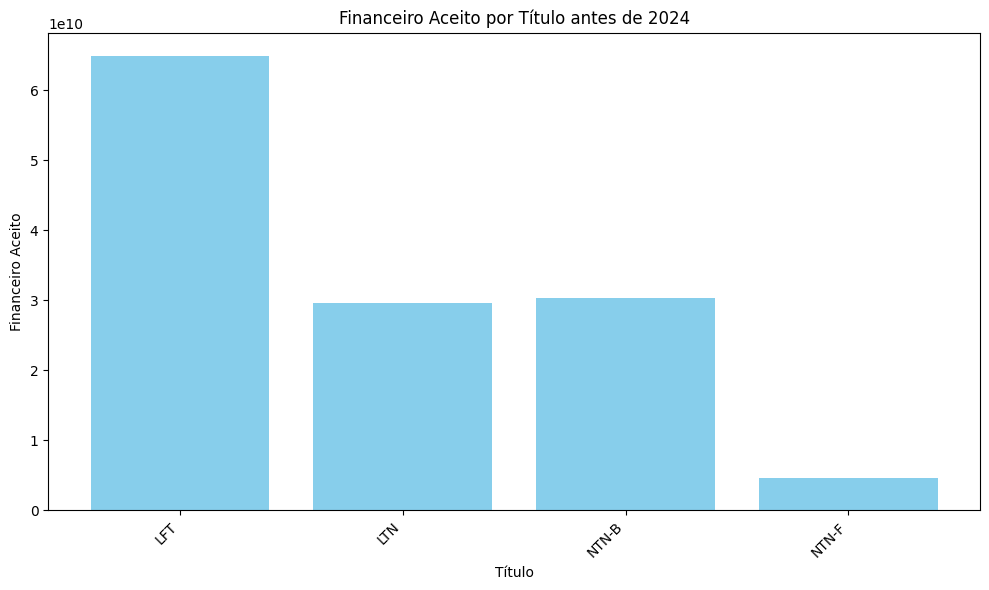

In [115]:
plt.figure(figsize=(10, 6))
plt.bar(df.sort_values(by='TITULO')['TITULO'], df.sort_values(by='TITULO')['FINANCEIRO ACEITO'], color='skyblue')
plt.xlabel('Título')
plt.ylabel('Financeiro Aceito')
plt.title('Financeiro Aceito por Título antes de 2024')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

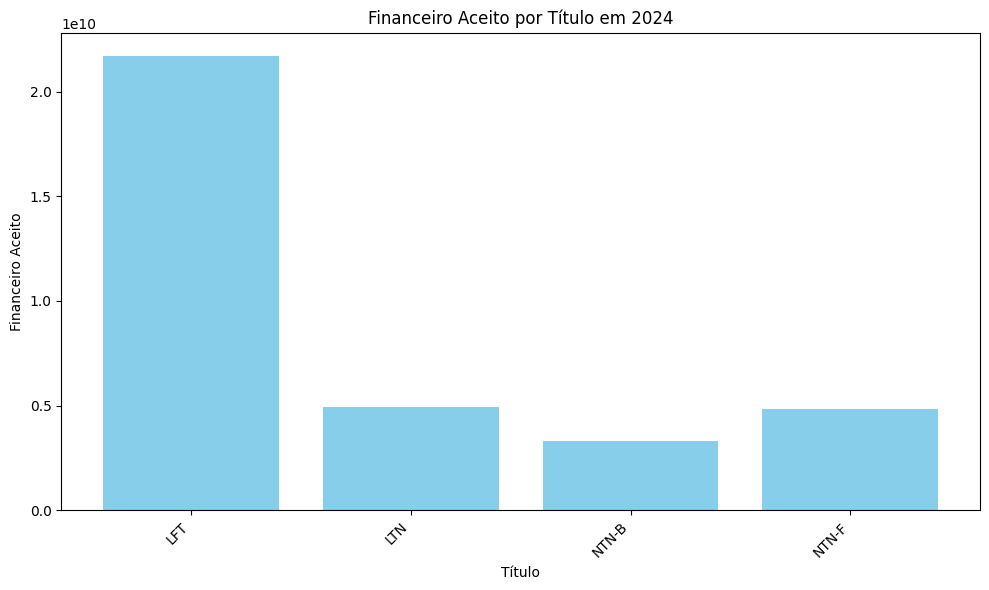

In [116]:
plt.figure(figsize=(10, 6))
plt.bar(df_2024.sort_values(by='TITULO')['TITULO'], df_2024.sort_values(by='TITULO')['FINANCEIRO ACEITO'], color='skyblue')
plt.xlabel('Título')
plt.ylabel('Financeiro Aceito')
plt.title('Financeiro Aceito por Título em 2024')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()